# Loan Prediction using Logistic Regression.
#### Source: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/.
This cool-little project to me is not just about predicting whether a loan is granted or not but also what kind of hidden insights we can get from the data itself. 
The steps below had been taken in order to process and analyse the dataset.

### 1. Introduction to the Dataframe.
### 2. Preprocessing + Data manipulation.
### 3. Features engineering.
### 4. Modelling.

# 1. Introduction to the Dataframe:

In [260]:
#Import Libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [261]:
# Read the train files:
data = pd.read_csv('./train_u6lujuX_CVtuZ9i.txt')

In [262]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### We can see some interesting points about our dataframe:
#### - There are 13 columns representing 13 features in the dataset.
#### - 7 of it contain categorical data: 
*Loan_ID*
*Gender*
*Married*
*Education*
*Self_Employed*
*Property_Area*
*Loan_Status*
#### - While the other 6 consist of numerical data:
*Dependents*
*ApplicantIncome*
*CoapplicantIncome*
*LoanAmount*
*Loan_Amount_Term*
*Credit_History*
#### - Like every other real-life dataframe, the data itself is dirty so we'll have to clean it before doing the cool machine learning stuff with it. 

# 2. Preprocessing + Data Manipulation:

Like I mentioned in the first step, the data is dirty so we'll have to clean it first before exploring insight and modeling with it.

## a) Null values:

In this dataset, for simplicity I'll clean the data using two main methods. One will be filling the null values with the dominant values. This method will be applied to all categorical data. While the other one, which the null values are replaced by the mean of its column, wll be applied to all numerical data.

In [264]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [265]:
data['Gender'] = data['Gender'].fillna('Male')
data['Dependents'] = data['Dependents'].str.rstrip('+')
data['Dependents'].fillna(data['Dependents'].dropna().mode().values[0],inplace=True)
data['Self_Employed'] = data['Self_Employed'].fillna( data['Self_Employed'].dropna().mode().values[0])
data['Married'] = data['Married'].fillna('Yes')
data['LoanAmount'].fillna(value=data['LoanAmount'].mean(),axis=0,inplace=True)
data['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].mean(),axis=0,inplace=True)
data['Credit_History'] = data['Credit_History'].fillna(2)

In [266]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After cleaning up the data, we'll dig further into it see if there're any valuable insight. First, let's take a look at some plot to see if there're any unusable features because more is not always better right? 

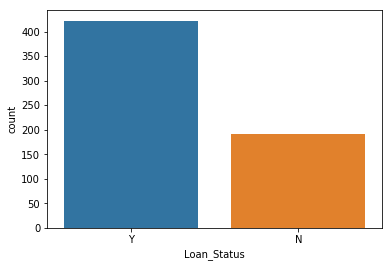

In [267]:
sns.countplot('Loan_Status',data=data)


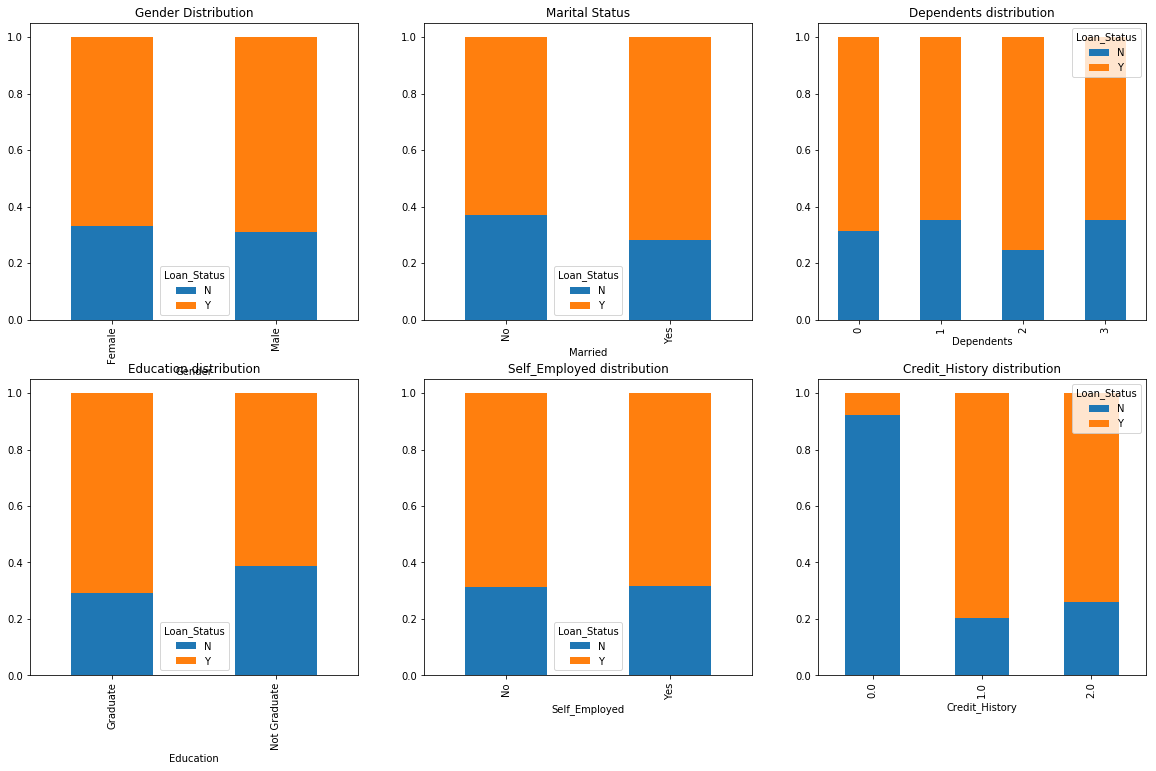

In [268]:
f,ax=plt.subplots(2,3,figsize=(20,12))
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,ax=ax[0,0])
ax[0,0].set_title('Gender Distribution')
Married = pd.crosstab(data['Married'],data['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind ='bar',stacked =True,ax=ax[0,1])
ax[0,1].set_title('Marital Status')
Dependents = pd.crosstab(data['Dependents'],data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,2])
ax[0,2].set_title('Dependents distribution')
Education = pd.crosstab(data['Education'],data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[1,0])
ax[1,0].set_title('Education distribution')
Self_Employed = pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[1,1])
ax[1,1].set_title('Self_Employed distribution')
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[1,2])
ax[1,2].set_title('Credit_History distribution')
plt.show()


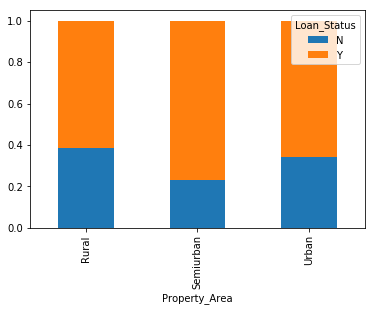

In [269]:
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

From the above plots, we can see some patterns:
- Gender, Dependents, Self_Employed does not play a significant role.
- Marrital status, Education and Property Area does affect the loan approval. 
- Credit History is absolutely crucial throughout the process. 


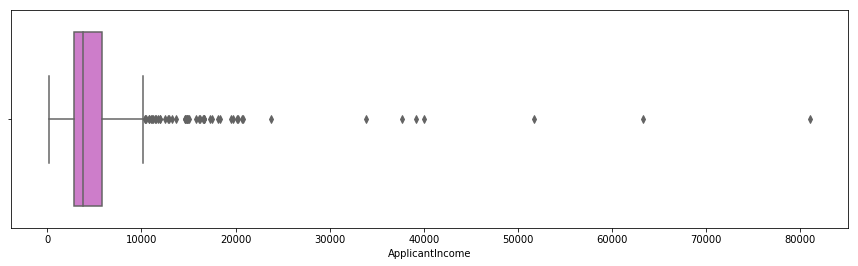

In [270]:
plt.figure(figsize=(15, 4))
sns.boxplot(data['ApplicantIncome'],color='orchid')

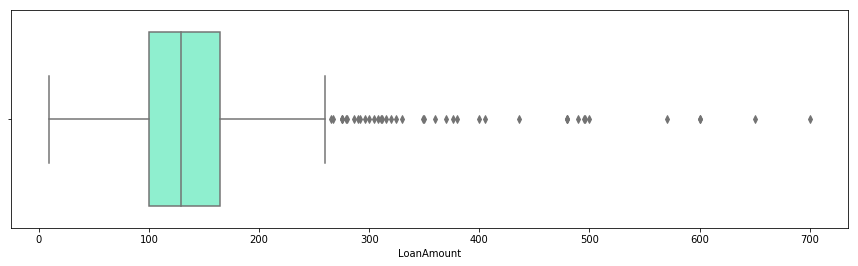

In [271]:
plt.figure(figsize=(15, 4))
sns.boxplot(data['LoanAmount'],color='aquamarine')


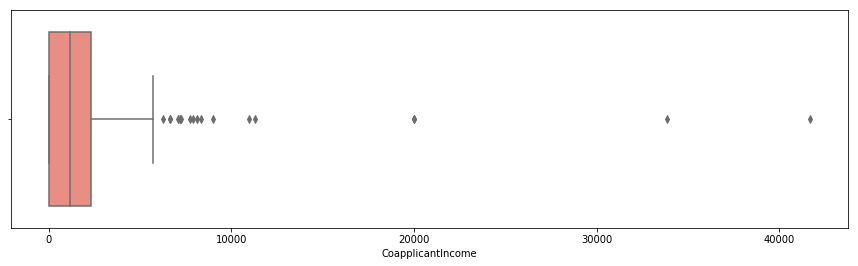

In [272]:
plt.figure(figsize=(15, 4))
sns.boxplot(data['CoapplicantIncome'],color='salmon')

As a result of the numerical data in our dataframe are positively skewed, we'll not scale it using preprocessing tools or numpy in this notebook. 

## b) Coverting categorical values to numerical values:

In [273]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Gender'] = label.fit_transform(data['Gender'])
data['Married'] = label.fit_transform(data['Married'])
data['Education'] = label.fit_transform(data['Education'])
data['Self_Employed'] = label.fit_transform(data['Self_Employed'])
data['Property_Area'] = label.fit_transform(data['Property_Area'])
data['Loan_Status'] = label.fit_transform(data['Loan_Status'])
data['Dependents'] = data['Dependents'].astype(int)
data = pd.get_dummies(data, columns=['Credit_History'])

# 3. Features Enginerring: 

In [274]:
# Adding two more features, Total_Income  and LoanOverIncome
# Note that since the Loan_Amount_Term is is months and the Income is also monthly, we'll have to scale everything
# back in the same measure. 
data['Total_Income'] = data['ApplicantIncome']+data['CoapplicantIncome']
data['LoanOverIncome'] = (((data['LoanAmount']*1000)/data['Loan_Amount_Term'])/data['Total_Income'])*100

In [275]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.00000,1.000000,1.000000,1.000000,1.000000
Married,614.0,0.653094,0.476373,0.00000,0.000000,1.000000,1.000000,1.000000
Dependents,614.0,0.744300,1.009623,0.00000,0.000000,0.000000,1.000000,3.000000
Education,614.0,0.218241,0.413389,0.00000,0.000000,0.000000,0.000000,1.000000
Self_Employed,614.0,0.133550,0.340446,0.00000,0.000000,0.000000,0.000000,1.000000
ApplicantIncome,614.0,5403.459283,6109.041673,150.00000,2877.500000,3812.500000,5795.000000,81000.000000
CoapplicantIncome,614.0,1621.245798,2926.248369,0.00000,0.000000,1188.500000,2297.250000,41667.000000
LoanAmount,614.0,146.412162,84.037468,9.00000,100.250000,129.000000,164.750000,700.000000
Loan_Amount_Term,614.0,342.000000,64.372489,12.00000,360.000000,360.000000,360.000000,480.000000
Property_Area,614.0,1.037459,0.787482,0.00000,0.000000,1.000000,2.000000,2.000000


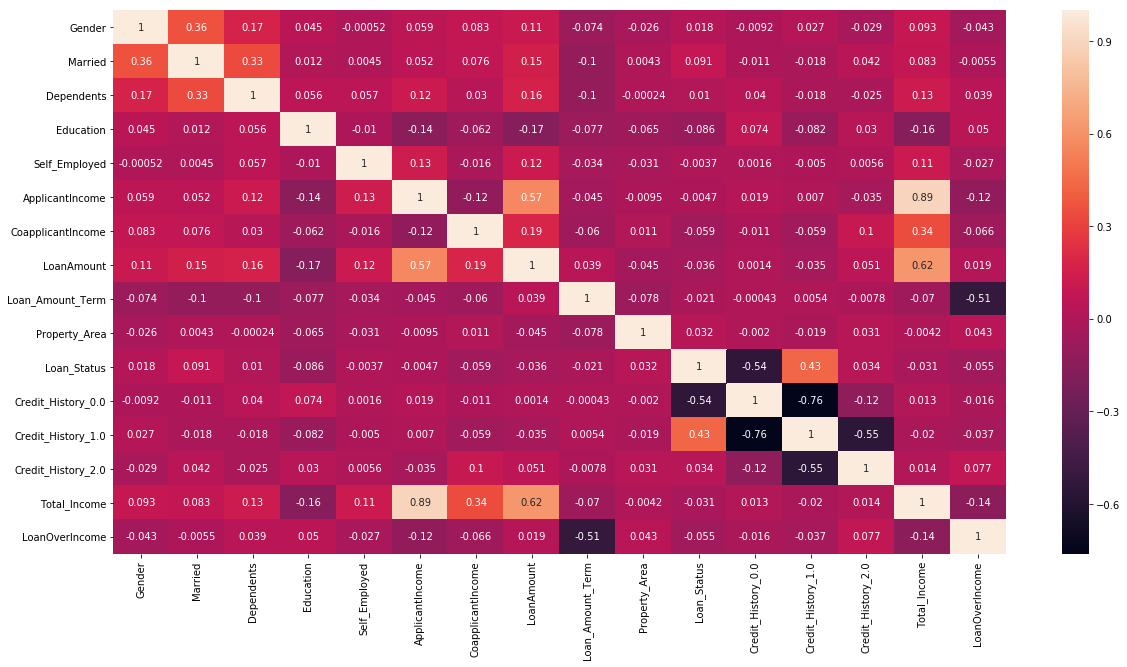

In [227]:
plt.figure(figsize=[20,10])
sns.heatmap(data = data.corr(),annot = True)

Like we saw before, it is reasonable to pick the below features for our model:
['Total_Income','Education','Property_Area','Credit_History_0.0','Credit_History_1.0''Credit_History_2.0','Married','LoanOverIncome']

# 4. Modeling: 

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [229]:
X = data[['Total_Income','Education','Property_Area','Credit_History_0.0','Credit_History_1.0','Credit_History_2.0','Married','LoanOverIncome']]
y = data['Loan_Status']

In [230]:
clf = LogisticRegression()

In [231]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25, random_state=68)

In [232]:
clf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [233]:
prediction_val = clf.predict(X_val)
print('Accuracy val: ', accuracy_score(y_val,prediction_val))
print('Confusion matrix val: ', confusion_matrix(y_val,prediction_val))
print('Classification report val: ', classification_report(y_val,prediction_val))


Accuracy val:  0.7987012987012987
Confusion matrix val:  [[ 19  27]
 [  4 104]]
Classification report val:                precision    recall  f1-score   support

           0       0.83      0.41      0.55        46
           1       0.79      0.96      0.87       108

   micro avg       0.80      0.80      0.80       154
   macro avg       0.81      0.69      0.71       154
weighted avg       0.80      0.80      0.77       154



In [234]:
clf.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [235]:
test = pd.read_csv('./test_Y3wMUE5_7gLdaTN.txt')

In [236]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [237]:
#Null values handling
test['Gender'] = test['Gender'].fillna('Male')
test['Dependents'] = test['Dependents'].str.rstrip('+')
test['Dependents'].fillna(test['Dependents'].dropna().mode().values[0],inplace=True)
test['Self_Employed'] = test['Self_Employed'].fillna( test['Self_Employed'].dropna().mode().values[0])
test['Married'] = test['Married'].fillna('Yes')
test['LoanAmount'].fillna(value=test['LoanAmount'].mean(),axis=0,inplace=True)
test['Loan_Amount_Term'].fillna(value=test['Loan_Amount_Term'].mean(),axis=0,inplace=True)
test['Credit_History'] = test['Credit_History'].fillna(2)

In [238]:
#Label Encoder
test['Gender'] = label.fit_transform(test['Gender'])
test['Married'] = label.fit_transform(test['Married'])
test['Education'] = label.fit_transform(test['Education'])
test['Self_Employed'] = label.fit_transform(test['Self_Employed'])
test['Property_Area'] = label.fit_transform(test['Property_Area'])
test['Dependents'] = test['Dependents'].astype(int)
test = pd.get_dummies(test, columns=['Credit_History'])

In [239]:
#Features Engineering
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']
test['LoanOverIncome'] = (((test['LoanAmount']*1000)/test['Loan_Amount_Term'])/test['Total_Income'])*100

In [240]:
#Define X_test
X_test = test[['Total_Income','Education','Property_Area','Credit_History_0.0','Credit_History_1.0','Credit_History_2.0','Married','LoanOverIncome']]
X_test

,Total_Income,Education,Property_Area,Credit_History_0.0,Credit_History_1.0,Credit_History_2.0,Married,LoanOverIncome
0,5720,0,2,0,1,0,1,5.341880
1,4576,0,2,0,1,0,1,7.648601
2,6800,0,2,0,1,0,1,8.496732
3,4886,0,2,0,0,1,1,5.685178
4,3276,1,2,0,1,0,0,6.613757
5,5587,1,2,0,1,0,1,7.557226
6,2226,1,1,0,1,0,0,7.362484
7,3881,1,0,1,0,0,1,10.521343
8,13633,0,2,0,1,0,1,8.557666
9,4800,1,1,0,1,0,0,7.118056


In [241]:
prediction_test = clf.predict(X_test)

In [242]:
test['Loan_Status'] = prediction_test
test['Loan_Status'] = test['Loan_Status'].map({1:'Y',0:'N'})
final = test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area','Total_Income','LoanOverIncome','Credit_History_0.0','Credit_History_1.0','Credit_History_2.0'], axis=1)
final.to_csv('submission_final.csv', index=False)

![title](./result.png)


![title](./rank.png)


## References:
https://github.com/harshitahluwalia7895/Loan_Prediction/blob/master/.ipynb_checkpoints/New_analysis-checkpoint.ipynb
https://github.com/saikatb/Loan_Prediction_Analysis/blob/master/Loan_Prediction_Analysis_Version1.0.md